Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582291 entries, 0 to 582290
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  582258 non-null  float64
 1   Y                  582258 non-null  float64
 2   OBJECTID           582291 non-null  int64  
 3   GLOBALID           543961 non-null  object 
 4   FIREOCCURID        83810 non-null   object 
 5   CN                 276140 non-null  object 
 6   REVDATE            578580 non-null  object 
 7   FIRENAME           555228 non-null  object 
 8   COMPLEXNAME        9798 non-null    object 
 9   FIREYEAR           582283 non-null  float64
 10  UNIQFIREID         379587 non-null  object 
 11  SOFIRENUM          454991 non-null  object 
 12  LOCALFIRENUM       177551 non-null  object 
 13  SECURITYID         289104 non-null  object 
 14  DISCOVERYDATETIME  533068 non-null  object 
 15  SIZECLASS          581082 non-nul

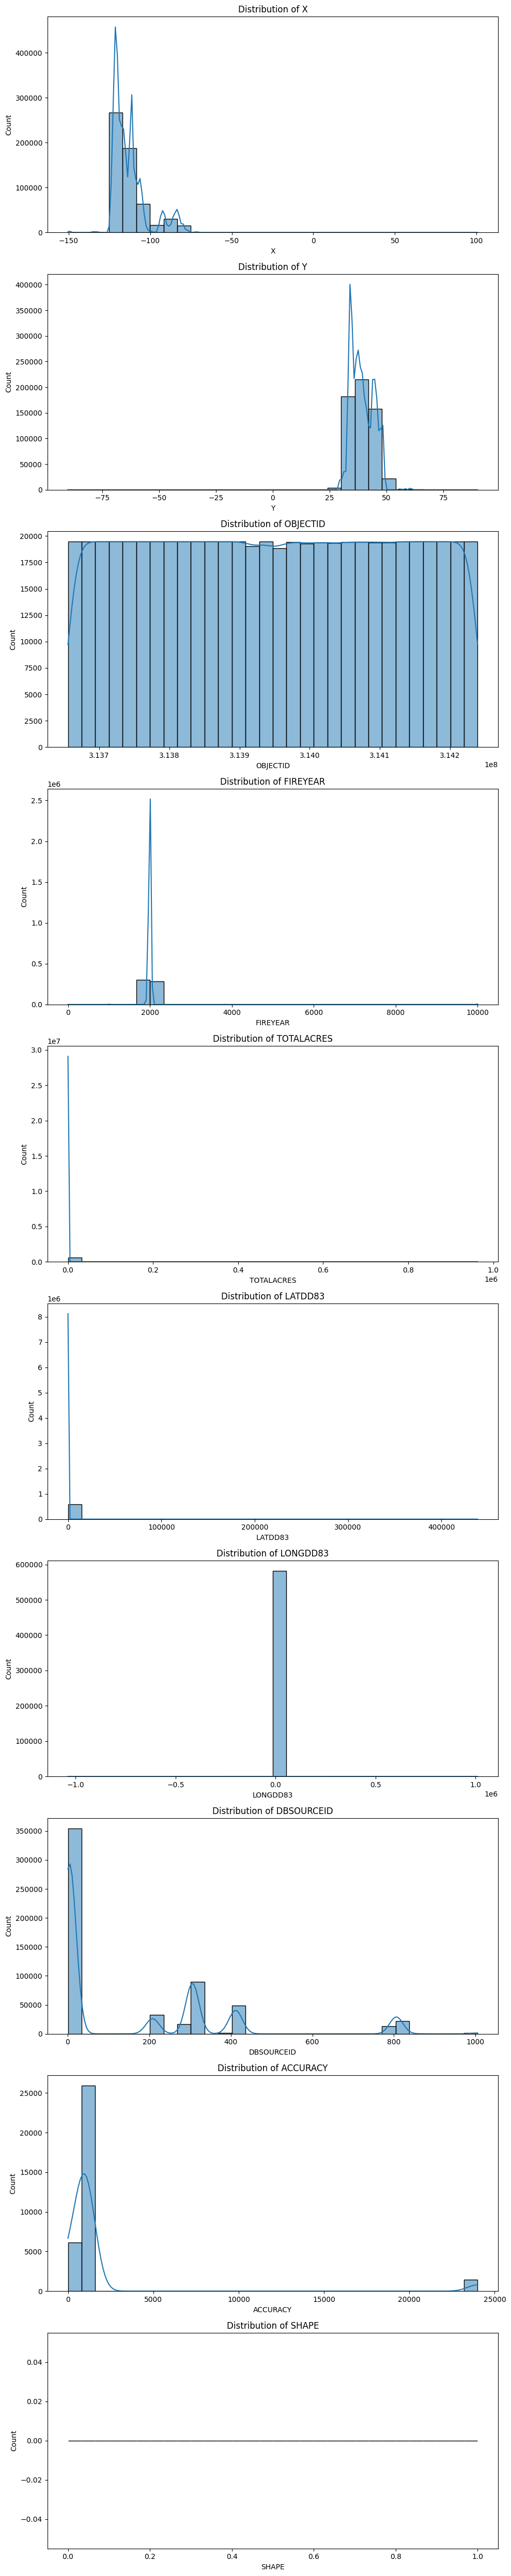

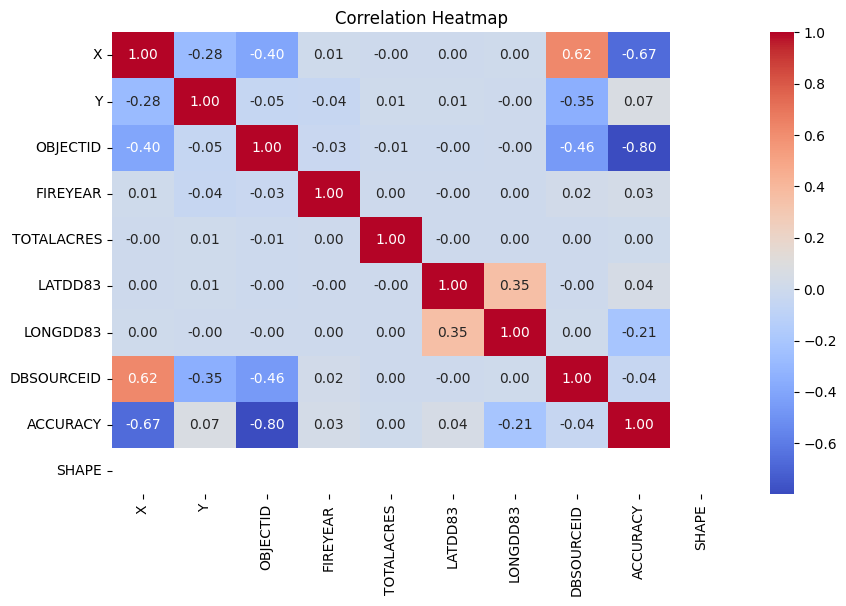

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/home/pranav/nighthawk/Pranav_2025/Pranav_2025/assets/data/National_USFS_Fire_Occurrence_Point_(Feature_Layer).csv"
df = pd.read_csv(file_path, low_memory=False)

# Drop problematic columns (hardcoded column names due to dtype warning)
drop_columns = ['column_name_5', 'column_name_11', 'column_name_12', 'column_name_13', 'column_name_18', 'column_name_19']
df = df.drop(columns=[col for col in drop_columns if col in df.columns])

# Display basic information
print("Dataset Overview:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Visualization - Distribution of Key Numeric Columns
numeric_columns = df.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 5 * len(numeric_columns)))
for ax, col in zip(axes, numeric_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for Numeric Columns (if applicable)
if len(numeric_columns) > 1:
    sns.pairplot(df[numeric_columns])
    plt.show()
